In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
names1880 = pd.read_csv("babynames/yob1880.txt",
                       names=['name','sex','births'])
names1880
names1880.shape
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [80]:
years = range(1880,2011) # 2010년도 까지의 데이터를 저장
pieces = [] #계속 append하여 연도별 데이터 저장
for year in years:
    path = "babynames/yob%d.txt" % year
    frame = pd.read_csv(path,names=['name','sex','births'])
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names
# len(pieces)
#     names1880 = pd.read_csv("babynames/yob1880.txt",
#                        names=['name','sex','births'])

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [81]:
total_birth = names.pivot_table(
'births',
index = 'year',
columns = 'sex', # 여기까지하면 default인 평균이 구해진다
aggfunc=sum
)

In [7]:
total_birth.plot()

In [82]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    #group.info()
    #print(group)
    #retrun group
names=names.groupby(['year', 'sex']).apply(add_prop)
print(names)

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
5         Margaret   F    1578  1880  0.017342
6              Ida   F    1472  1880  0.016177
7            Alice   F    1414  1880  0.015540
8           Bertha   F    1320  1880  0.014507
9            Sarah   F    1288  1880  0.014155
10           Annie   F    1258  1880  0.013825
11           Clara   F    1226  1880  0.013474
12            Ella   F    1156  1880  0.012704
13        Florence   F    1063  1880  0.011682
14            Cora   F    1045  1880  0.011484
15          Martha   F    1040  1880  0.011429
16           Laura   F    1012  1880  0.011122
17          Nellie   F     995  1880  0.010935
18           Grace   F     982  1880  0.010792
19          Carrie   F     949  1880  0.010429
20           

In [79]:
names

,name,sex,births,year,prop,letter_name
0,Mary,F,7065,1880,0.077643,[Mary]
1,Anna,F,2604,1880,0.028618,[Anna]
2,Emma,F,2003,1880,0.022013,[Emma]
3,Elizabeth,F,1939,1880,0.021309,[Elizabeth]
4,Minnie,F,1746,1880,0.019188,[Minnie]
5,Margaret,F,1578,1880,0.017342,[Margaret]
6,Ida,F,1472,1880,0.016177,[Ida]
7,Alice,F,1414,1880,0.015540,[Alice]
8,Bertha,F,1320,1880,0.014507,[Bertha]
9,Sarah,F,1288,1880,0.014155,[Sarah]


In [78]:
# # 연도별, 성별에 따른 빈도수가 가장 높은 이름 천개 추출
# def get_top1000(group):
# #     print(group.sort_values(by='births')sort_values(by='births'))
#     return group.sort_values(by='births',ascending=False)[:1000]

# grouped = names.groupby(['year','sex'])
# top1000 = grouped.apply(get_top1000) # apply 뒤에 적용할 함수 --> 가장 빈도수 높은 천개이름 추출함수
# top1000.index=np.arange(len(top1000))
# top1000.index

#연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
    #print(group)

grouped=names.groupby(['year', 'sex'])
print(grouped)a
# top1000=grouped.apply(get_top1000)
# top1000.index=np.arange(len(top1000))
# top1000.index

In [10]:
#이름 유행 분석
boys=top1000[top1000.sex=="M"]
girls=top1000[top1000.sex=="F"]

In [11]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum) # top1000중 중복되지 않는 
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000138D9E33780>,
      dtype=object)

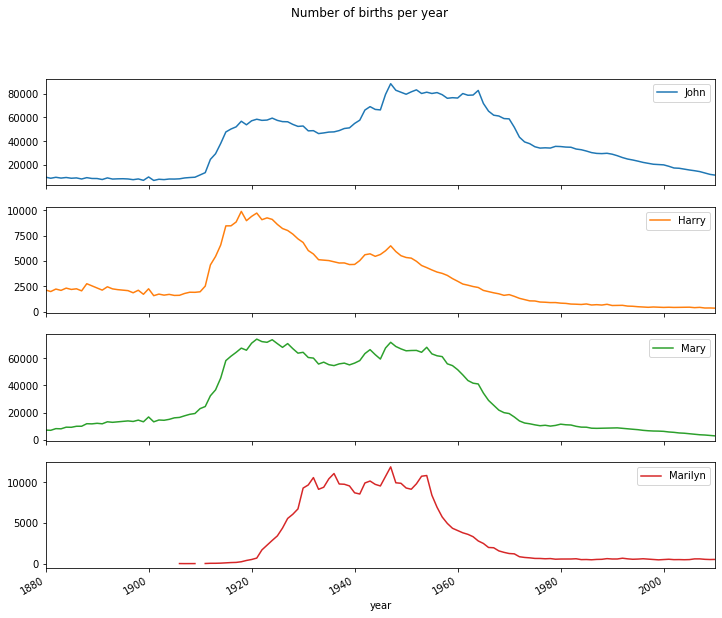

In [12]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), title="Number of births per year") # size 단위는 인치 이다.

In [15]:
# 2010년의 경우, 상위 천개에 대한 전체 출생수에 대한 ?비율
table = top1000.pivot_table('prop',index='year',columns='name',aggfunc=sum)
table.shape
table.plot(xticks=arange(1880,2010,10), yticks=np.linspace(0,1.2,13)) #범례 위치는 알아서 best위치에 지정됨

NameError: name 'arange' is not defined

In [21]:
df = boys[boys.year==2010]
df
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5) # 정렬된 상태에서 0.5가 되는 위치가 117번 째이다(0번부터시작이니까)
prop_cumsum.values[116]

0.5006516075268308

In [23]:
names[names.year==2010].shape # 2010년 남녀의 이름 

(33838, 5)

In [25]:
df = boys[boys.year==1900] #cumsum은 전체에 대한 누적합이므로, 
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1 # --> 이 값을 출력하면 최근이 될 수록, 수치가 늘어나서 이름이 다양해짐을 알 수 있다.

25

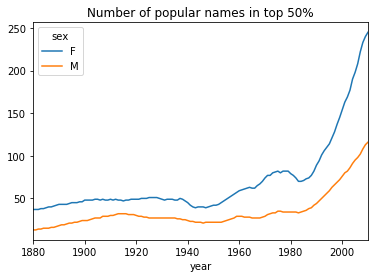

In [42]:
def get_quantile_count(group, q=0.5): # 분위수를 구하는 함수 q=0.5는 default로 누적합 50%를 출력함
    group = group.sort_values('prop',ascending=False)
#     print(group)
    return group.prop.cumsum().values.searchsorted(q)
    
    
diver = top1000.groupby(['year','sex']).apply(get_quantile_count)
diver # 기본적으로 stack되어, year,sex가 행으로 오는 구조
# diver.unstack('year') # unstack하면 좌우로 정렬됨
diver = diver.unstack('sex')
diver.plot(title="Number of popular names in top 50%")

In [56]:
get_last_letter = lambda x :x[-1] #마지막 단어를 호출하는 함수
last_letters = names.name.map(get_last_letter)
last_letters.name='last_letter'
last_letters
# print(names.name)
# names.name.map(get_last_letter)

table = names.pivot_table('births',index=last_letters, columns=['sex','year'],aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [58]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [61]:
subtable.sum()
letter_prop = subtable/(subtable.sum())
letter_prop
letter_prop['F']

year,1910,1960,2010
last_letter,,,
a,0.273390,0.341853,0.381240
b,NaN,0.000343,0.000256
c,0.000013,0.000024,0.000538
d,0.017028,0.001844,0.001482
e,0.336941,0.215133,0.178415
f,NaN,0.000010,0.000055
g,0.000144,0.000157,0.000374
h,0.051529,0.036224,0.075852
i,0.001526,0.039965,0.031734


In [64]:
letter_prop['F'].plot(kind=bar(), rot=0,title='Female')
letter_prop['M'].plot(kind=bar(), rot=0,title='Male')

NameError: name 'bar' is not defined

In [70]:
# d/n/y로 끝나는 이름을 가진 남자아이의 출생 비율을 시각화
letter_prop = table/table.sum()
dny_ts = letter_prop.ix[['d','n','y]]
dny_ts

SyntaxError: EOL while scanning string literal (<ipython-input-70-c072f7bda270>, line 3)

### mission 01

In [ ]:
# 이름을 글자로 분리 --> 알파벳 문자 비율의 변화(1880-2010)
1880-2010까지의 이름에 사용된 알파벳 문자에 대한 빈도수를 조사하고,
빈도수에 대해 내림차순 정렬하여 출력 
# 과거에는 인기가 없었으나. 최근 인기있는 이름?
# 남여 이름의 인기가 바뀐 이름? ex) 과거에는 남자이름으로 인기가 많았으나 최근 여자이름으로 인기있는 이름

In [83]:
names.info()
names['births']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


0          7065
1          2604
2          2003
3          1939
4          1746
5          1578
6          1472
7          1414
8          1320
9          1288
10         1258
11         1226
12         1156
13         1063
14         1045
15         1040
16         1012
17          995
18          982
19          949
20          858
21          808
22          794
23          793
24          787
25          783
26          769
27          768
28          704
29          700
           ... 
1690754       5
1690755       5
1690756       5
1690757       5
1690758       5
1690759       5
1690760       5
1690761       5
1690762       5
1690763       5
1690764       5
1690765       5
1690766       5
1690767       5
1690768       5
1690769       5
1690770       5
1690771       5
1690772       5
1690773       5
1690774       5
1690775       5
1690776       5
1690777       5
1690778       5
1690779       5
1690780       5
1690781       5
1690782       5
1690783       5
Name: births, Length: 16

In [76]:
names['letter_name'] = names['name'].str.rsplit()
names['letter_name']
# names['name']

0               [Mary]
1               [Anna]
2               [Emma]
3          [Elizabeth]
4             [Minnie]
5           [Margaret]
6                [Ida]
7              [Alice]
8             [Bertha]
9              [Sarah]
10             [Annie]
11             [Clara]
12              [Ella]
13          [Florence]
14              [Cora]
15            [Martha]
16             [Laura]
17            [Nellie]
18             [Grace]
19            [Carrie]
20             [Maude]
21             [Mabel]
22            [Bessie]
23            [Jennie]
24          [Gertrude]
25             [Julia]
26            [Hattie]
27             [Edith]
28            [Mattie]
29              [Rose]
              ...     
1690754      [Zaviyon]
1690755     [Zaybrien]
1690756     [Zayshawn]
1690757       [Zayyan]
1690758         [Zeal]
1690759       [Zealan]
1690760     [Zecharia]
1690761     [Zeferino]
1690762     [Zekariah]
1690763         [Zeki]
1690764       [Zeriah]
1690765       [Zeshan]
1690766    

In [ ]:
# toji = open("BEXX0014.txt", encoding ='utf-8')
# text = "".join(toji.readlines())
# dial = re.findall('<p>"(.+)"<p>',text)
# dial[:10]

path = 'BEXX0014.txt'
with open(path, 'r',encoding='utf-16') as toji:
    text=toji.read() 

pat = re.compile('<p>"(.+)"<p>',text)
pat.findall(text)